In [3]:

import requests
from pyquery import PyQuery as pquery
import csv


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">

<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">
<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">
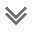

In [4]:
url = "https://www.worldometers.info/coronavirus/"
headers = {
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36',
    }
response = requests.request("GET", url, headers=headers)
 html=response.text
print(response.text)